<a href="https://colab.research.google.com/github/vijaylokith/Personalized-Medicine-Redefining-Cancer-Treatment/blob/main/Personalized_cancer_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Personalized Cancer Diagnosis**

## **1. Business problem**

### **1.1) Problem Statement**





Classify the given gene variation base on the text clinical references

### **1.2) Business Constrains**



1.   Cost of mis-classification (very high)
2.   Latency requirment (No)
3.   Inter-Pretability requirment (Yes)



## **2. Mapping Real World to ML Problem**

### **2.1) Problem Type**

Multi - classification (9 classes)

### **2.2) Performance Measure**



1.   Multi - class log loss (cross entropy) -> KPI
2.   Confusion Matrix



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Reading the data

In [ ]:
train_variation = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Personalized_cancer_diagnosis/data/training/training_variants")
print(train_variation.shape)
train_variation.head()

(3321, 4)


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [ ]:
train_text = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Personalized_cancer_diagnosis/data/training/training_text", sep="\|\|",names=["ID","TEXT"],skiprows=1)
print(train_text.shape)
train_text.tail(10)

(3321, 2)


,ID,TEXT
3311,3311,The AML1/EVI-1 chimeric gene is generated by t...
3312,3312,Balanced chromosomal translocations are freque...
3313,3313,The BCR-ABL fusion protein generated by t(9;22...
3314,3314,Introduction Myelodysplastic syndromes (MDS) ...
3315,3315,The RUNX gene family includes three evolutiona...
3316,3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,The Runt-related transcription factor 1 gene (...
3319,3319,The RUNX1/AML1 gene is the most frequent targe...
3320,3320,The most frequent mutations associated with le...


## **Data Cleaning**



un pre-processed word

In [ ]:
train_text["TEXT"][3320]

"The most frequent mutations associated with leukemia are recurrent somatic chromosomal translocations or inversions, many of which involve the polyomavirus enhancer-binding protein or core-binding factor transcriptional regulation complex (PEBP2/CBF). Several translocations involve the α subunit of this complex, the RUNX1 gene (also called AML1, CBFα2, or PEBP2αB) on chromosome 21q22.1 (t(8;21), t(3;21), and t(12;21)). Additionally, the β subunit of the complex, PEBP2β also called CBFβ, is disrupted in inv(16)(p13;q22).1 An abundance of evidence points to the existence of genes that predispose to hematologic malignancies. However, large multiple-generation families with hematologic malignancies alone are rare.2 Only 2 loci for familial hematologic malignancies have been identified to date, 1 on chromosome 21q22.13 and the other on 16q22.4 5 These loci contain RUNX1 andPEBP2β/CBFβ, respectively.Studies of families that demonstrate single-gene inheritance for leukemia predisposition sho

In [ ]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

def default_nlp_preprocessing(total_text, column, index):
                
  if type(total_text) is not int:
    string = ""
    total_text = re.sub('[!@#$%^&*()]',' ',total_text)
    total_text = re.sub('[^a-zA-Z0-9\n]',' ',total_text)
    total_text = re.sub('\s+',' ',total_text)
    total_text = total_text.lower()

    for word in total_text.split():
      if word not in stop_words:
        string += word + " "
    
    train_text[column][index] = string


In [ ]:
for index, row in train_text.iterrows():
  if type(row["TEXT"]) is str:
    default_nlp_preprocessing(row["TEXT"],"TEXT",index)
  

In [ ]:
train_text["TEXT"][3320]

'frequent mutations associated leukemia recurrent somatic chromosomal translocations inversions many involve polyomavirus enhancer binding protein core binding factor transcriptional regulation complex pebp2 cbf several translocations involve subunit complex runx1 gene also called aml1 cbf 2 pebp2 b chromosome 21q22 1 8 21 3 21 12 21 additionally subunit complex pebp2 also called cbf disrupted inv 16 p13 q22 1 abundance evidence points existence genes predispose hematologic malignancies however large multiple generation families hematologic malignancies alone rare 2 2 loci familial hematologic malignancies identified date 1 chromosome 21q22 13 16q22 4 5 loci contain runx1 andpebp2 cbf respectively studies families demonstrate single gene inheritance leukemia predisposition help identify genes mechanisms involved first steps leukemia development autosomal dominant familial platelet disorder fpd aml acute myelogenous leukemia online mendelian inheritance man 601399 good model validate hy

In [ ]:
train = pd.merge(train_variation,train_text, on="ID", how="left")
train.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [ ]:
sum(train.duplicated())

0

In [ ]:
train.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
TEXT         5
dtype: int64

In [ ]:
train.loc[train.isnull().values]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [ ]:
train[train.isnull().values]["ID"]

1109    1109
1277    1277
1407    1407
1639    1639
2755    2755
Name: ID, dtype: int64

In [ ]:
missing = train[train.isnull().values]["ID"].tolist()

In [ ]:
train["TEXT"].loc[missing] = train.Gene + " " + train.Variation

In [ ]:
train.iloc[missing]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F
1277,1277,ARID5B,Truncating Mutations,1,ARID5B Truncating Mutations
1407,1407,FGFR3,K508M,6,FGFR3 K508M
1639,1639,FLT1,Amplification,6,FLT1 Amplification
2755,2755,BRAF,G596C,7,BRAF G596C


In [ ]:
train["Class"].value_counts().sort_index()

1    568
2    452
3     89
4    686
5    242
6    275
7    953
8     19
9     37
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

y_temp = train["Class"].values

x_train, test_df, y_train, y_test = train_test_split(train,y_temp,test_size = 0.2, stratify = y_temp)
train_df, cv_df, y_train, y_cv = train_test_split(x_train,y_train, test_size = 0.2, stratify = y_train)

In [ ]:
print(train_df.shape, cv_df.shape, test_df.shape)

(2124, 5) (532, 5) (665, 5)


In [ ]:
train_df.head()

,ID,Gene,Variation,Class,TEXT
487,487,TP53,P47S,3,abstract purpose adrenocortical carcinoma acc ...
756,756,ERBB2,D769A,4,her2 receptor tyrosine kinase driver oncogene ...
752,752,ERBB2,Y1248F,4,mutant c erbb 2 protein glu instead val 659 ex...
189,189,EGFR,S768I,7,gefitinib effective first line therapy advance...
2011,2011,MAP2K1,I111P,2,utilizing genetic screen yeast saccharomyces c...


In [ ]:
cv_df.head()

,ID,Gene,Variation,Class,TEXT
2505,2505,BRCA1,D1739V,4,mutations brca1 brca2 account majority heredit...
1626,1626,VHL,Q96P,4,von hippel lindau tumor suppressor protein pvh...
2519,2519,BRCA1,E1060A,5,mutations brca1 brca2 account majority heredit...
208,208,EGFR,V774A,2,purpose clinical features epidermal growth fac...
1562,1562,ALK,R1231Q,3,era personalized medicine understanding molecu...


In [ ]:
test_df.head()

,ID,Gene,Variation,Class,TEXT
1479,1479,FGFR2,K525E,7,activating mutations tyrosine kinase domain re...
1731,1731,MSH2,Deletion,1,abstract december 1997 national cancer institu...
2426,2426,BRCA1,C64G,4,published analyses effects missense mutations ...
1634,1634,MAP2K4,N234I,4,systematic characterization somatic mutations ...
929,929,PDGFRA,V544_L545insAVLVLLVIVIISLI,7,introduction pediatric high grade gliomas hgg ...


Text(0.5, 1.0, 'test data')

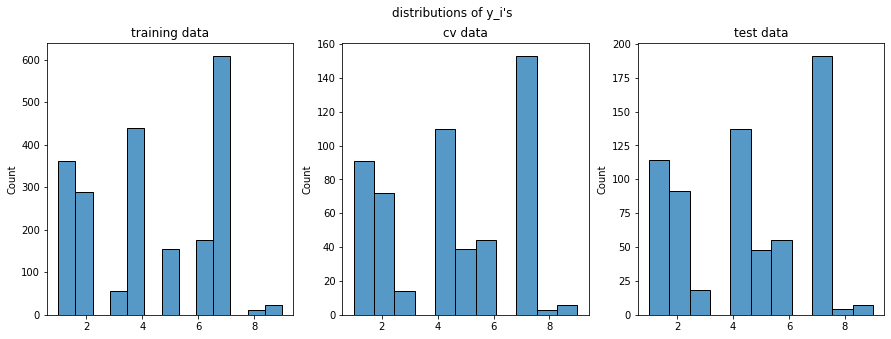

In [ ]:
fig,axis = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("distributions of y_i's")

sn.histplot(ax=axis[0],data=y_train)
axis[0].set_title("training data")

sn.histplot(ax=axis[1], data=y_cv)
axis[1].set_title("cv data")

sn.histplot(ax=axis[2], data=y_test)
axis[2].set_title("test data")

We can see that all three data have similar distribution

## **EDA**

**1) On gene feature**

In [ ]:
unique_gene_features = train_df["Gene"].value_counts()
unique_gene_features.shape

(240,)

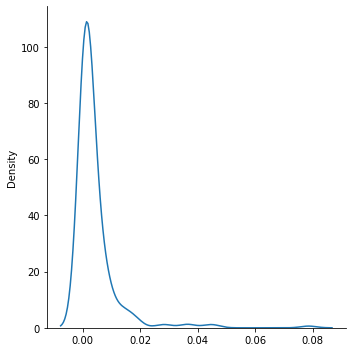

In [ ]:
h = unique_gene_features.values/sum(unique_gene_features.values)
sn.displot(data=h,kind="kde")

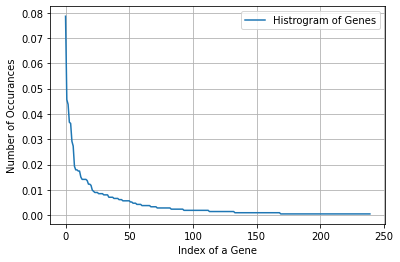

In [ ]:
s = sum(unique_gene_features.values);
h = unique_gene_features.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def response_train(feature,alpha,df):

  
  value_count = train_df[feature].value_counts()
  response = dict()

  for key,value in value_count.items():
    temp = []
    for i in range(1,10):
      numerator = train_df.loc[(train_df["Class"] == i) & (train_df[feature] == key)]
      temp.append((numerator.shape[0] + alpha * 10) / (value + 90*alpha))
      #vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))
    response[key] = temp
  return response

def response_unseen(feature,alpha,df):
  final_dict = response_train(feature,alpha,df)
  value_count = train_df[feature].value_counts()
  result = []
  for index,row in df.iterrows():
    if row[feature] in dict(value_count).keys():
      result.append(final_dict[row[feature]])
    else:
      result.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
  return result


In [ ]:
alpha = 1
train_gene_response = np.array(response_unseen( "Gene",  alpha,train_df))

In [ ]:
# one-hotencoding
from sklearn.feature_extraction.text import CountVectorizer

onehot = CountVectorizer()
train_gene_onehot = onehot.fit_transform(train_df["Gene"])
test_gene_onehot = onehot.transform(test_df["Gene"])
cv_gene_onehot = onehot.transform(cv_df["Gene"])

In [ ]:
print(train_gene_onehot.shape)
print(test_gene_onehot.shape)
cv_gene_onehot.shape

(2124, 239)
(665, 239)


(532, 239)

In [ ]:
# check if the gene feature is good enough to predict the yi's(by building a model only using gene feature).
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss


In [ ]:
clf = SGDClassifier(loss='log', random_state=42)
clf.fit(train_gene_onehot,y_train)
prob_clf = CalibratedClassifierCV(clf)
prob_clf.fit(train_gene_onehot,y_train)


CalibratedClassifierCV(base_estimator=SGDClassifier(loss='log',
                                                    random_state=42))

In [ ]:
# check if our model is stable
predict = prob_clf.predict_proba(train_gene_onehot)
score = log_loss(y_train,predict)
print(f"the train loss is{score}")
predict1 = prob_clf.predict_proba(cv_gene_onehot)
score1 = log_loss(y_cv,predict1)
print(f"the cv loss is{score1}")
predict2 = prob_clf.predict_proba(test_gene_onehot)
score2 = log_loss(y_test,predict2)
print(f"the test loss is{score2}")

the train loss is0.9993586052398425
the cv loss is1.1584258704459984
the test loss is1.1425085224439964


Variation Feature

In [ ]:
unique_variation_feature = train_df["Variation"].value_counts()

print(f"Out of {train_df.shape[0]} we have {unique_variation_feature.shape[0]} unique values")
unique_variation_feature.sort_values(ascending=False)

Out of 2124 we have 1925 unique values


Truncating Mutations    61
Amplification           49
Deletion                45
Fusions                 24
Q61H                     3
                        ..
D92V                     1
E79Q                     1
A148T                    1
H1402Y                   1
PVT1-MYC Fusion          1
Name: Variation, Length: 1925, dtype: int64

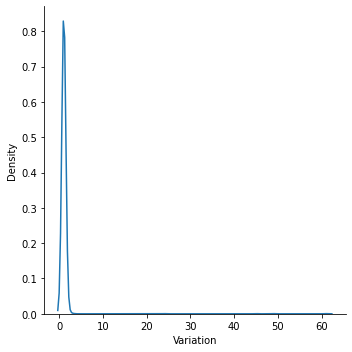

In [ ]:
#sum = sum(unique_variation_feature.values)

sn.displot(data=unique_variation_feature,kind="kde")

In [ ]:
train_variation_onehot = onehot.fit_transform(train_df["Variation"])
test_variation_onehot = onehot.transform(test_df["Variation"])
cv_variation_onehot = onehot.transform(cv_df["Variation"])

print(f"{train_variation_onehot.shape}{test_variation_onehot.shape}{cv_variation_onehot.shape}")

(2124, 1961)(665, 1961)(532, 1961)


In [ ]:
clf.fit(train_variation_onehot,y_train)
probscore = CalibratedClassifierCV(clf)
finalm = probscore.fit(train_variation_onehot,y_train)
score_ = finalm.predict_proba(cv_variation_onehot)

print(f"logg loss = {log_loss(y_cv,score_)}")

logg loss = 1.685876048958897


text feature

In [ ]:
def count_dict(txt):

  countdict = dict()
  for index,row in txt.iterrows():
    for word in row["Text"].split():
      if word in countdict.keys():
        countdict[word] = countdict[word] + 1
      else:
        countdict[word] =1
        
  return countdict 

In [ ]:
bow = CountVectorizer(min_df=3)

train_bow = bow.fit_transform(train_df["TEXT"])
train_bow_features = bow.get_feature_names()
print(len(train_bow_features))
train_bow.shape

53663


(2124, 53663)

In [ ]:
from sklearn.preprocessing import normalize
train_bow = normalize(train_bow)

cv_bow = bow.transform(cv_df["TEXT"])
cv_bow = normalize(cv_bow)

test_bow = bow.transform(test_df["TEXT"])
test_bow = normalize(test_bow)

## **Machine Learning Modeling(Multi - variate analysis)**

In [ ]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [ ]:
from scipy.sparse import hstack

temp_x = hstack((train_gene_onehot,train_variation_onehot))
temp_y = hstack((cv_gene_onehot,cv_variation_onehot))
temp_z = hstack((test_gene_onehot,test_variation_onehot))

train_x = hstack((temp_x,train_bow)).tocsr()
cv_x = hstack((temp_y,cv_bow)).tocsr()
test_x = hstack((temp_z, test_bow)).tocsr()

train_y = np.array(list(y_train))
cv_y = np.array(list(y_cv))
test_y = np.array(list(y_test))

In [ ]:
print(test_y.shape)

(665,)


**1) Naive base**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

para = [0.0001,0.001, 0.1, 1, 10, 100,1000]
for i in para:
  clf1 = MultinomialNB(alpha=i)
  clf1.fit(train_x,train_y)
  clf_1 = CalibratedClassifierCV(clf1)
  clf_1.fit(train_x,train_y)
  pred_y = clf_1.predict_proba(cv_x)
  print(f"for {i} the log loss is: {log_loss(cv_y, pred_y)}")


for 0.0001 the log loss is: 1.1683085995906493
for 0.001 the log loss is: 1.1665102027614318
for 0.1 the log loss is: 1.2124521725573365
for 1 the log loss is: 1.3267370106557004
for 10 the log loss is: 1.3159800619987292
for 100 the log loss is: 1.2956587936135289
for 1000 the log loss is: 1.2953975748966169


the train loss with the best estimator is: 0.5393977902424568
the cv loss with the best estimator is: 1.1665102027614318
the test loss with the best estimator is: 1.1340713261990198


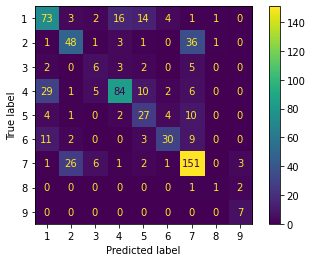

In [ ]:
clf1 = MultinomialNB(alpha=0.001)
clf1.fit(train_x,train_y)
clf_1 = CalibratedClassifierCV(clf1)
clf_1.fit(train_x,train_y)


print(f"the train loss with the best estimator is: {log_loss(train_y, clf_1.predict_proba(train_x))}")
print(f"the cv loss with the best estimator is: {log_loss(cv_y, clf_1.predict_proba(cv_x))}")
print(f"the test loss with the best estimator is: {log_loss(test_y, clf_1.predict_proba(test_x))}")

plot_confusion_matrix(clf1,test_x,test_y)

**2)KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

para = [5,10,20,30,35,50,100]
for i in para:
  clf1 = KNeighborsClassifier(n_neighbors=i)
  clf1.fit(train_x,train_y)
  clf_1 = CalibratedClassifierCV(clf1)
  clf_1.fit(train_x,train_y)
  pred_y = clf_1.predict_proba(cv_x)
  print(f"for {i} the log loss is: {log_loss(cv_y, pred_y)}")

for 5 the log loss is: 1.091845365339371
for 10 the log loss is: 1.085906285109468
for 20 the log loss is: 1.1427589874441606
for 30 the log loss is: 1.1766710207171949
for 35 the log loss is: 1.1948871556097578
for 50 the log loss is: 1.2171883020262004
for 100 the log loss is: 1.255992820659651


the train loss with the best estimator is: 0.9791400454745357
the cv loss with the best estimator is: 1.085906285109468
the test loss with the best estimator is: 1.051881931832918


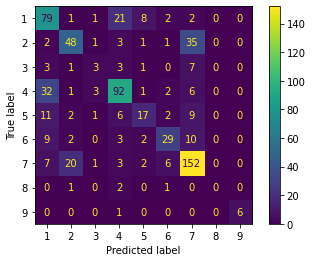

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=10)
clf1.fit(train_x,train_y)
clf_1 = CalibratedClassifierCV(clf1)
clf_1.fit(train_x,train_y)


print(f"the train loss with the best estimator is: {log_loss(train_y, clf_1.predict_proba(train_x))}")
print(f"the cv loss with the best estimator is: {log_loss(cv_y, clf_1.predict_proba(cv_x))}")
print(f"the test loss with the best estimator is: {log_loss(test_y, clf_1.predict_proba(test_x))}")

plot_confusion_matrix(clf1,test_x,test_y)

**3) Logistic Regression (without class balancing)**

In [ ]:
from sklearn.linear_model import LogisticRegression

para = [0.0001,0.001, 0.1, 1, 10, 100,1000]
for i in para:
  clf1 = LogisticRegression(C=i)
  clf1.fit(train_x,train_y)
  clf_1 = CalibratedClassifierCV(clf1)
  clf_1.fit(train_x,train_y)
  pred_y = clf_1.predict_proba(cv_x)
  print(f"for {i} the log loss is: {log_loss(cv_y, pred_y)}")

for 0.0001 the log loss is: 1.1880318559376182
for 0.001 the log loss is: 1.1862611901473068
for 0.1 the log loss is: 1.087732113979228
for 1 the log loss is: 0.9777196305633609
for 10 the log loss is: 0.944862305944988
for 100 the log loss is: 0.9407391864736037
for 1000 the log loss is: 0.9463426844737286


the train loss with the best estimator is: 0.3749139642884723
the cv loss with the best estimator is: 0.9407391864736037
the test loss with the best estimator is: 0.9343680094327376


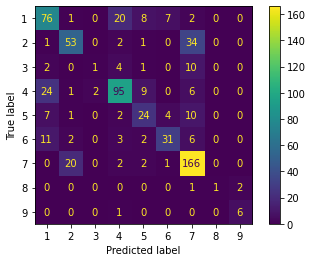

In [ ]:
clf1 = LogisticRegression(C=100)
clf1.fit(train_x,train_y)
clf_1 = CalibratedClassifierCV(clf1)
clf_1.fit(train_x,train_y)


print(f"the train loss with the best estimator is: {log_loss(train_y, clf_1.predict_proba(train_x))}")
print(f"the cv loss with the best estimator is: {log_loss(cv_y, clf_1.predict_proba(cv_x))}")
print(f"the test loss with the best estimator is: {log_loss(test_y, clf_1.predict_proba(test_x))}")

plot_confusion_matrix(clf1,test_x,test_y)

**4) LogisticRegression (with class balancing)**

In [ ]:
para = [0.001, 0.1, 1, 10, 100]
for i in para:
  clf1 = LogisticRegression(C=i,class_weight="balanced")
  clf1.fit(train_x,train_y)
  clf_1 = CalibratedClassifierCV(clf1)
  clf_1.fit(train_x,train_y)
  pred_y = clf_1.predict_proba(cv_x)
  print(f"for {i} the log loss is: {log_loss(cv_y, pred_y)}")

for 0.001 the log loss is: 1.2095704574596298
for 0.1 the log loss is: 1.1085476668820127
for 1 the log loss is: 0.9875508520349963
for 10 the log loss is: 0.9467802809109194
for 100 the log loss is: 0.940894173254442


the train loss with the best estimator is: 0.3812284397579848
the cv loss with the best estimator is: 0.940894173254442
the test loss with the best estimator is: 0.934964713032149


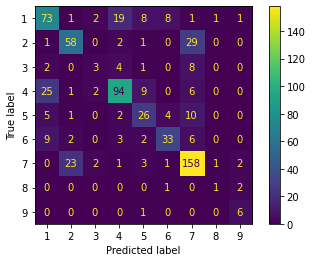

In [ ]:
clf1 = LogisticRegression(C=100,class_weight="balanced")
clf1.fit(train_x,train_y)
clf_1 = CalibratedClassifierCV(clf1)
clf_1.fit(train_x,train_y)


print(f"the train loss with the best estimator is: {log_loss(train_y, clf_1.predict_proba(train_x))}")
print(f"the cv loss with the best estimator is: {log_loss(cv_y, clf_1.predict_proba(cv_x))}")
print(f"the test loss with the best estimator is: {log_loss(test_y, clf_1.predict_proba(test_x))}")

plot_confusion_matrix(clf1,test_x,test_y)

**5) Linear SVC**

In [ ]:
from sklearn.svm import LinearSVC

para = [0.001, 0.1, 1, 10, 100]
for i in para:
  clf1 = LinearSVC(C=i,class_weight="balanced")
  clf1.fit(train_x,train_y)
  clf_1 = CalibratedClassifierCV(clf1)
  clf_1.fit(train_x,train_y)
  pred_y = clf_1.predict_proba(cv_x)
  print(f"for {i} the log loss is: {log_loss(cv_y, pred_y)}")

for 0.001 the log loss is: 1.2305616868589713
for 0.1 the log loss is: 1.0013917701901807
for 1 the log loss is: 0.9684300057146524
for 10 the log loss is: 0.9733823556840662
for 100 the log loss is: 0.9784617317397338


the train loss with the best estimator is: 0.2815829627684405
the cv loss with the best estimator is: 0.9733823404461299
the test loss with the best estimator is: 0.9576069219506299


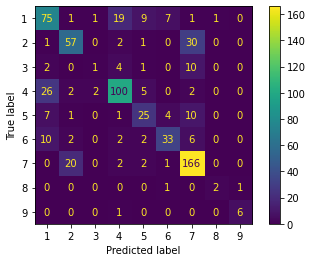

In [ ]:
clf1 = LinearSVC(C=10,class_weight="balanced")
clf1.fit(train_x,train_y)
clf_1 = CalibratedClassifierCV(clf1)
clf_1.fit(train_x,train_y)


print(f"the train loss with the best estimator is: {log_loss(train_y, clf_1.predict_proba(train_x))}")
print(f"the cv loss with the best estimator is: {log_loss(cv_y, clf_1.predict_proba(cv_x))}")
print(f"the test loss with the best estimator is: {log_loss(test_y, clf_1.predict_proba(test_x))}")

plot_confusion_matrix(clf1,test_x,test_y)

**6) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

para = [50,100,200,250,500]
for i in para:
  clf1 = RandomForestClassifier(n_estimators=i)
  clf1.fit(train_x,train_y)
  clf_1 = CalibratedClassifierCV(clf1)
  clf_1.fit(train_x,train_y)
  pred_y = clf_1.predict_proba(cv_x)
  print(f"for {i} the log loss is: {log_loss(cv_y, pred_y)}")

for 50 the log loss is: 1.0938808885704938
for 100 the log loss is: 1.0852631568887106
for 200 the log loss is: 1.0857445617485157
for 250 the log loss is: 1.0821041154683064
for 500 the log loss is: 1.0820342077221174


the train loss with the best estimator is: 0.38200086713488934
the cv loss with the best estimator is: 1.0839345072608237
the test loss with the best estimator is: 1.0709707116334368


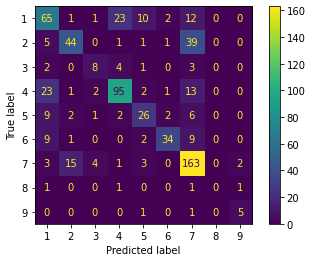

In [ ]:
clf1 = RandomForestClassifier(n_estimators=500)
clf1.fit(train_x,train_y)
clf_1 = CalibratedClassifierCV(clf1)
clf_1.fit(train_x,train_y)


print(f"the train loss with the best estimator is: {log_loss(train_y, clf_1.predict_proba(train_x))}")
print(f"the cv loss with the best estimator is: {log_loss(cv_y, clf_1.predict_proba(cv_x))}")
print(f"the test loss with the best estimator is: {log_loss(test_y, clf_1.predict_proba(test_x))}")

plot_confusion_matrix(clf1,test_x,test_y)